In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.drop(['society','availability'],axis=1,inplace=True)

In [7]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df.dtypes

area_type      object
location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [9]:
df['location']=df['location'].fillna(method='bfill')
df['location'].isnull().sum()

0

In [10]:
df['total_sqft'].value_counts()
df['total_sqft'].unique()
sqft=[]
for d in df['total_sqft']:
    if '-' in d:
        k=d.split(' - ')
        sqft.append(float(k[0])+float(k[1])/2)
    elif d.isnumeric():
        sqft.append(d)


    else:
        sqft.append(None)
df['total_sqft']=sqft
df['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [11]:
df['total_sqft']=df['total_sqft'].fillna(method='bfill')

In [12]:
df['total_sqft'].isnull().sum()

0

In [13]:
df['total_sqft']=df['total_sqft'].astype(int)

In [14]:
df=df.rename(columns={'bath':'bathroom'})
df=df.rename(columns={'size':'bedroom'})

In [15]:
df['bathroom']=df['bathroom'].fillna(method='bfill')
df['balcony']=df['balcony'].fillna(method='bfill')
df['bedroom']=df['bedroom'].fillna(method='bfill')

In [16]:
df['bathroom'].isnull().sum()

0

In [17]:
df['balcony'].isnull().sum()

0

In [18]:
df['bedroom'].isnull().sum()

0

In [19]:
df.dtypes

area_type      object
location       object
bedroom        object
total_sqft      int64
bathroom      float64
balcony       float64
price         float64
dtype: object

In [20]:
df.head()

,area_type,location,bedroom,total_sqft,bathroom,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [21]:
df['bathroom']=df['bathroom'].astype(int)
df['balcony']=df['balcony'].astype(int)

In [22]:
df

,area_type,location,bedroom,total_sqft,bathroom,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2,1,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5,3,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2,3,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3,1,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2,1,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4,0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5,1,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2,1,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4,1,488.00


In [23]:
Bedroom=[]
for i in df['bedroom']:
    i=i.split()
    Bedroom.append(i[0])
Bedroom
df['bedroom']=Bedroom

In [24]:
df['bedroom']=df['bedroom'].astype(int)

In [25]:
df.isnull().sum()

area_type     0
location      0
bedroom       0
total_sqft    0
bathroom      0
balcony       0
price         0
dtype: int64

In [26]:
p=[]
for j in df['price']:
    p.append(j*100000)
df['price']=p

In [27]:
df['price']=df['price'].astype(int)

In [28]:
df.head()

,area_type,location,bedroom,total_sqft,bathroom,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2,1,3907000
1,Plot Area,Chikka Tirupathi,4,2600,5,3,12000000
2,Built-up Area,Uttarahalli,3,1440,2,3,6200000
3,Super built-up Area,Lingadheeranahalli,3,1521,3,1,9500000
4,Super built-up Area,Kothanur,2,1200,2,1,5100000


In [29]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['area_type']=label.fit_transform(df['area_type'])
df['location']=label.fit_transform(df['location'])

In [30]:
df

,area_type,location,bedroom,total_sqft,bathroom,balcony,price
0,3,419,2,1056,2,1,3907000
1,2,317,4,2600,5,3,12000000
2,0,1179,3,1440,2,3,6200000
3,3,757,3,1521,3,1,9500000
4,3,716,2,1200,2,1,5100000
...,...,...,...,...,...,...,...
13315,0,1252,5,3453,4,0,23100000
13316,3,1004,4,3600,5,1,40000000
13317,0,972,2,1141,2,1,6000000
13318,3,907,4,4689,4,1,48800000


In [31]:
df.dtypes

area_type     int64
location      int64
bedroom       int64
total_sqft    int64
bathroom      int64
balcony       int64
price         int64
dtype: object

In [32]:
y=df['price']
x=df.drop('price',axis=1)

In [33]:
x

,area_type,location,bedroom,total_sqft,bathroom,balcony
0,3,419,2,1056,2,1
1,2,317,4,2600,5,3
2,0,1179,3,1440,2,3
3,3,757,3,1521,3,1
4,3,716,2,1200,2,1
...,...,...,...,...,...,...
13315,0,1252,5,3453,4,0
13316,3,1004,4,3600,5,1
13317,0,972,2,1141,2,1
13318,3,907,4,4689,4,1


In [34]:
y

0         3907000
1        12000000
2         6200000
3         9500000
4         5100000
           ...   
13315    23100000
13316    40000000
13317     6000000
13318    48800000
13319     1700000
Name: price, Length: 13320, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [65]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
mod=Sequential()

In [66]:
mod.add(Flatten(input_shape=(xtrain.shape[1],)))
mod.add(Dense(units=12,activation='relu'))
mod.add(Dense(units=1,activation='linear'))

In [67]:
mod.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 6)                 0         
                                                                 
 dense_6 (Dense)             (None, 12)                84        
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
mod.compile(optimizer='Adam',loss='mean_squared_error')


In [69]:
h=mod.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
333/333 [==============================] - 1s 2ms/step - loss: 323330775187456.0000 - val_loss: 449162982195200.0000
Epoch 2/10
333/333 [==============================] - 1s 2ms/step - loss: 323083546132480.0000 - val_loss: 448784622419968.0000
Epoch 3/10
333/333 [==============================] - 1s 2ms/step - loss: 322666397433856.0000 - val_loss: 448219263795200.0000
Epoch 4/10
333/333 [==============================] - 1s 2ms/step - loss: 322080973258752.0000 - val_loss: 447469389348864.0000
Epoch 5/10
333/333 [==============================] - 1s 2ms/step - loss: 321351063699456.0000 - val_loss: 446562111062016.0000
Epoch 6/10
333/333 [==============================] - 1s 2ms/step - loss: 320477943824384.0000 - val_loss: 445491858898944.0000
Epoch 7/10
333/333 [==============================] - 1s 2ms/step - loss: 319477719760896.0000 - val_loss: 444302387838976.0000
Epoch 8/10
333/333 [==============================] - 1s 2ms/step - loss: 318359920967680.0000 - val_los

In [70]:
h.history

{'loss': [323330775187456.0,
  323083546132480.0,
  322666397433856.0,
  322080973258752.0,
  321351063699456.0,
  320477943824384.0,
  319477719760896.0,
  318359920967680.0,
  317126158057472.0,
  315804482535424.0],
 'val_loss': [449162982195200.0,
  448784622419968.0,
  448219263795200.0,
  447469389348864.0,
  446562111062016.0,
  445491858898944.0,
  444302387838976.0,
  442961519181824.0,
  441506062139392.0,
  439963799781376.0]}

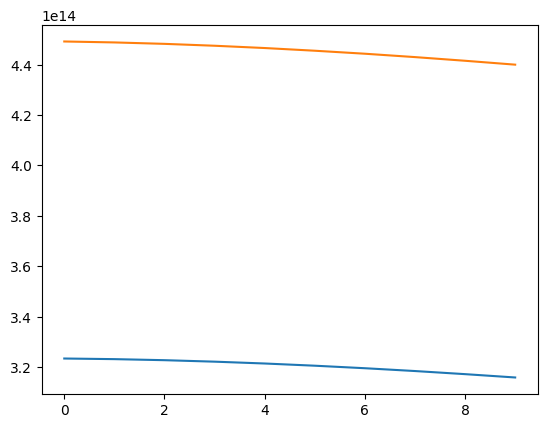

In [71]:
loss=h.history['loss']
val_loss=h.history['val_loss']
epoch=h.epoch
plt.plot(epoch,loss)
plt.plot(epoch,val_loss)